In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
http://nbviewer.jupyter.org/gist/sk9727192/d7cec57c50f956ef4040d2d75df0a14c

In [2]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [3]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [16]:
df=pd.read_csv("train.csv")

In [17]:
df=df["base_price"].fillna(0)

In [19]:
df.shape

(456548,)

In [5]:
df1=pd.read_csv("test_QoiMO9B.csv")

In [8]:
df3=pd.read_csv("fulfilment_center_info.csv")

In [9]:
df2=pd.read_csv("meal_info.csv")

In [7]:
df_last3=df[(df['week']==143) | (df['week']==144) | (df['week']==145) ]


In [9]:
df_last=df.loc[df.groupby(['center_id','meal_id']).week.idxmax()]

In [12]:
df_last["week"].unique()

array([145, 144,  64, 142, 143, 140, 111,  85,   3,   4, 134, 141,  80,
        44, 129,  16,  43,  37, 132, 113,  20, 136,  61, 118, 139,  94,
       108,  62, 119, 120, 123, 112, 133, 130, 110, 106, 135, 124, 131,
       125,  96,  14, 137,  36, 116], dtype=int64)

In [8]:
df_last3

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
446673,1161827,143,55,1885,150.35,150.35,0,0,176
446674,1006104,143,55,1993,151.35,150.35,0,0,109
446675,1152180,143,55,2539,151.35,151.35,0,0,94
446676,1005580,143,55,2139,292.03,292.03,0,0,14
446677,1066680,143,55,2631,163.93,163.93,0,0,41
446678,1159145,143,55,1248,163.93,164.93,0,0,80
446679,1221447,143,55,1778,195.03,194.03,0,0,216
446680,1363424,143,55,1062,190.12,190.12,0,0,338
446681,1405097,143,55,2707,242.56,241.56,0,0,244
446682,1003619,143,55,1207,383.18,383.18,0,0,95


In [6]:
df1[df1["week"]==143]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured


In [9]:
df["meal_id"].value_counts()

2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445     9727
2126     9705
1216     9695
2304     9676
2569     9459
2492     9382
1525     9359
2490     9247
2444     9097
2139     8899
2577     8667
2306     8294
2867     8092
1247     7184
1902     6748
1770     6682
1311     4682
1803     4674
1571     4511
1438     4385
2494     4206
1198     4206
1847     4084
2956     3319
2104     2357
Name: meal_id, dtype: int64

In [21]:
lol=df[df["homepage_featured"]==1]

In [25]:
haha=df[df["emailer_for_promotion"]==0]

In [11]:
df["homepage_featured"].value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


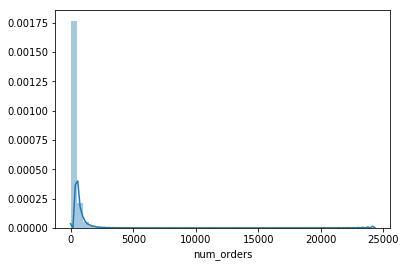

In [12]:
sns.distplot(df["num_orders"])

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


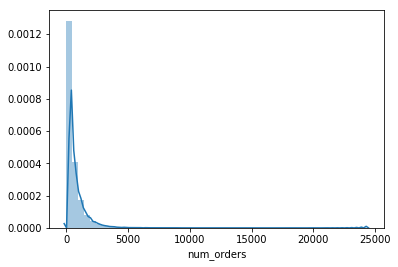

In [22]:
sns.distplot(lol["num_orders"])

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


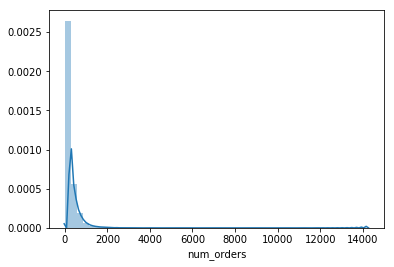

In [26]:
sns.distplot(haha["num_orders"])

In [18]:
df3.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [12]:
final=df.merge(df2,how="left",on="meal_id")

In [13]:
final.shape

(456548, 11)

In [14]:
final1=final.merge(df3,how="left",on="center_id")

In [15]:
final1.shape

(456548, 15)

In [16]:
final1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [17]:
test1=df1.merge(df2,how="left",on="meal_id")

In [18]:
test2=test1.merge(df3,how="left",on="center_id")

In [19]:
test2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0


In [20]:
final1["discount"]=final1["base_price"]-final1["checkout_price"]

In [21]:
test2["discount"]=test2["base_price"]-test2["checkout_price"]

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


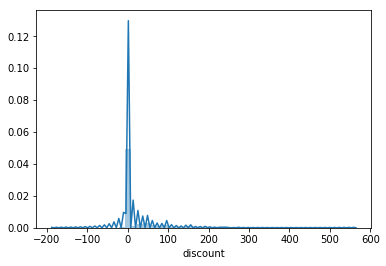

In [24]:
sns.distplot(final1["discount"])

In [25]:
haha1=final1[final1["discount"]<0]

In [26]:
haha2=final1[final1["discount"]>0]

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


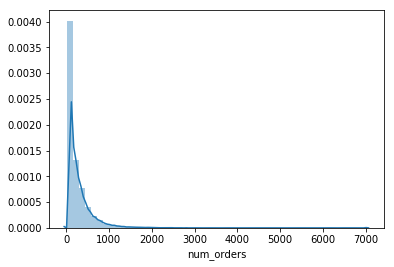

In [27]:
sns.distplot(haha1["num_orders"])

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


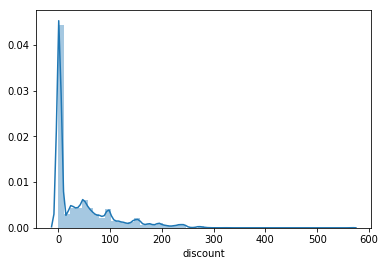

In [28]:
sns.distplot(haha2["discount"])

In [19]:
discount1 = []

for i, row in final1.iterrows():
    if row['discount'] > 0:
        discount1.append(1)
    else:
        discount1.append(0)
final1["discount1"]=discount1

In [20]:
discount1 = []

for i, row in test2.iterrows():
    if row['discount'] > 0:
        discount1.append(1)
    else:
        discount1.append(0)
test2["discount1"]=discount1

In [31]:
final1["region_code"].value_counts()

56    191228
34    116713
77     94612
85     30283
23      6434
71      6293
93      5721
35      5264
Name: region_code, dtype: int64

In [65]:
final1["category"].value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

In [66]:
final1["cuisine"].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

In [59]:
haha3=final1[final1["region_code"]==93]

In [39]:
haha3.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount1
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,-1.00,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,1.00,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,98.03,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,-1.00,0


In [78]:
haha4=final1[final1["cuisine"]=="Italian"]

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


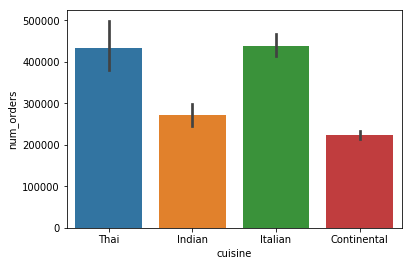

In [60]:
sns.barplot(x="cuisine",y="num_orders", data=haha3,estimator=sum)

In [21]:
italian = []

for i, row in final1.iterrows():
    if row['cuisine'] =="Italian":
        italian.append(1)
    elif (row["cuisine"]=="Thai") & (row["region_code"]==93):
        italian.append(1)
    elif row["cuisine"]=="Continental":
        italian.append(0)
    else:
        italian.append(2)
final1["italian"]=italian

In [22]:
italian = []

for i, row in test2.iterrows():
    if row['cuisine'] =="Italian":
        italian.append(1)
    elif (row["cuisine"]=="Thai") & (row["region_code"]==93):
        italian.append(1)
    elif row["cuisine"]=="Continental":
        italian.append(0)
    else:
        italian.append(2)
test2["italian"]=italian

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


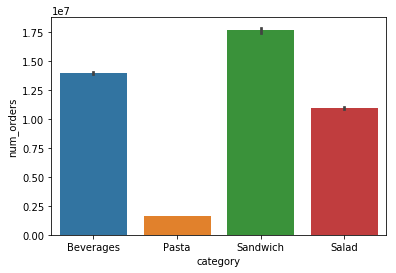

In [79]:
sns.barplot(x="category",y="num_orders", data=haha4,estimator=sum)

In [23]:
demand = []

for i, row in final1.iterrows():
    if (row['cuisine'] =="Continental") & ((row["category"]=="Beverages") or (row["category"]=="Pizza")):
        demand.append(1)
    elif (row['cuisine'] =="Continental") & ((row["category"]=="Seafood") or (row["category"]=="Fish")):
        demand.append(0)
    elif (row['cuisine'] =="Indian") & (row["category"]=="Rice Bowl"):
        demand.append(1)
    elif (row['cuisine'] =="Indian") & ((row["category"]=="Beverages") or (row["category"]=="Biriyani") or (row["category"]=="Desert") ):
        demand.append(0)
    elif (row['cuisine'] =="Thai") & (row["category"]=="Beverages"):
        demand.append(1)
    elif (row['cuisine'] =="Italian") & ((row["category"]=="Beverages") or (row["category"]=="Sandwich") or (row["category"]=="Salad")):
        demand.append(1)
    else:
        demand.append(0)
final1["demand"]=demand

In [24]:
demand = []

for i, row in test2.iterrows():
    if (row['cuisine'] =="Continental") & ((row["category"]=="Beverages") or (row["category"]=="Pizza")):
        demand.append(1)
    elif (row['cuisine'] =="Continental") & ((row["category"]=="Seafood") or (row["category"]=="Fish")):
        demand.append(0)
    elif (row['cuisine'] =="Indian") & (row["category"]=="Rice Bowl"):
        demand.append(1)
    elif (row['cuisine'] =="Indian") & ((row["category"]=="Beverages") or (row["category"]=="Biriyani") or (row["category"]=="Desert") ):
        demand.append(0)
    elif (row['cuisine'] =="Thai") & (row["category"]=="Beverages"):
        demand.append(1)
    elif (row['cuisine'] =="Italian") & ((row["category"]=="Beverages") or (row["category"]=="Sandwich") or (row["category"]=="Salad")):
        demand.append(1)
    else:
        demand.append(0)
test2["demand"]=demand

In [82]:
final1["center_type"].value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

In [87]:
haha5=final1[final1["center_type"]=="TYPE_C"]

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


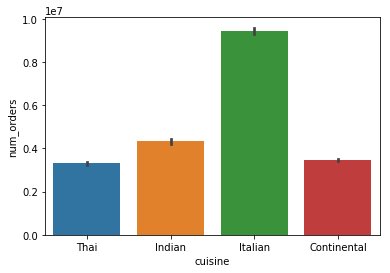

In [88]:
sns.barplot(x="cuisine",y="num_orders", data=haha5,estimator=sum)

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


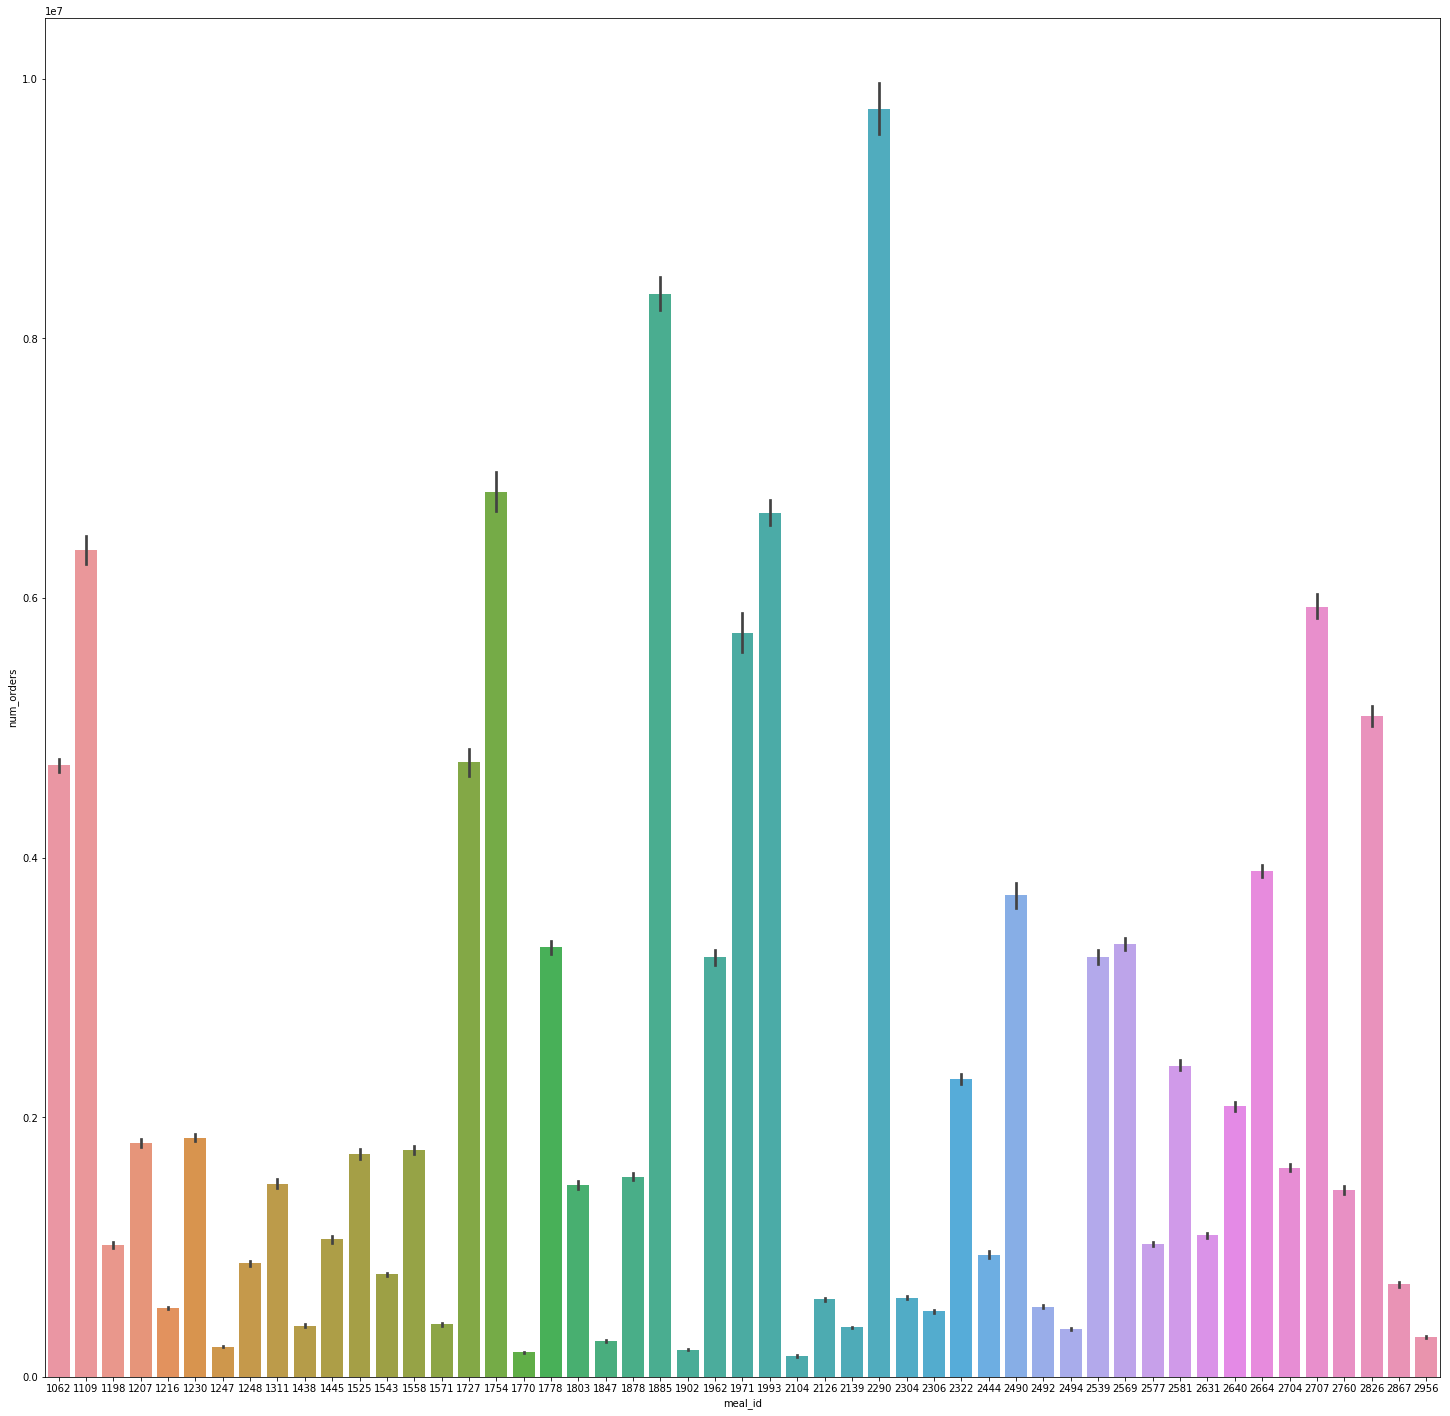

In [91]:
plt.figure(figsize=(25,25))
sns.barplot(x="meal_id",y="num_orders", data=final1,estimator=sum)

In [22]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [23]:
trn, sub = target_encode(final1["meal_id"], 
                         test2["meal_id"], 
                         target=final1.num_orders, 
                         min_samples_leaf=100,
                         smoothing=10,
                         noise_level=0.01)

In [24]:
sub

0        765.026184
1        599.783733
2        308.391137
3        104.834105
4         87.968010
5        292.000873
6        419.017587
7        529.694740
8        162.150274
9        168.116626
10       209.756052
11       894.777119
12       418.123774
13       566.417955
14       117.658646
15       190.200718
16       458.020231
17       620.630574
18       519.554452
19       240.496176
20       310.681842
21       317.059726
22       161.250749
23       217.374220
24       288.613948
25       104.147989
26        87.744347
27       183.301526
28       163.910456
29        58.023176
            ...    
32543    870.901360
32544    427.019215
32545    564.580818
32546     91.994754
32547    118.513013
32548    193.313895
32549    146.074582
32550     61.182658
32551     55.045045
32552     61.362356
32553    462.221977
32554    601.722181
32555    517.710860
32556     30.930200
32557     32.539818
32558    161.061056
32559    217.808836
32560    294.282005
32561    108.351911


In [25]:
final1["sales_mean"]=trn
test2["sales_mean"]=sub

In [26]:
final1.shape

(456548, 17)

In [27]:
test2.shape

(32573, 16)

In [28]:
finale=final1.drop(["id","week","num_orders"],axis=1)

In [29]:
test2e=test2.drop(["id","week"],axis=1)

In [30]:
test2e.shape

(32573, 14)

In [31]:
y=final1["num_orders"]

In [32]:
y

0         177
1         270
2         189
3          54
4          40
5          28
6         190
7         391
8         472
9         676
10        823
11        972
12        162
13        420
14        756
15        108
16         28
17         28
18        188
19        485
20        798
21         14
22        176
23        150
24        162
25        312
26        231
27         13
28         15
29         13
         ... 
456518     82
456519    323
456520    190
456521    593
456522     53
456523     27
456524     42
456525    176
456526    123
456527     28
456528     54
456529     54
456530    270
456531    540
456532    256
456533     69
456534     26
456535    162
456536    176
456537    256
456538     54
456539    123
456540    134
456541     67
456542     42
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [33]:
finale.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,discount,sales_mean
0,55,1885,136.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0,15.46,753.536116
1,55,1993,136.83,135.83,0,0,Beverages,Thai,647,56,TYPE_C,2.0,-1.00,594.092067
2,55,2539,134.86,135.86,0,0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,310.657318
3,55,2139,339.50,437.53,0,0,Beverages,Indian,647,56,TYPE_C,2.0,98.03,42.965613
4,55,2631,243.50,242.50,0,0,Beverages,Indian,647,56,TYPE_C,2.0,-1.00,104.441942


In [34]:
finale.shape

(456548, 14)

In [35]:
test2e.shape

(32573, 14)

In [37]:
finale.isna().sum()

center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
discount                 0
discount1                0
italian                  0
demand                   0
sales_mean               0
dtype: int64

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [37]:
le.fit(finale["category"])

LabelEncoder()

In [38]:
finale["categoryfinal"]=le.transform(finale["category"])

In [39]:
test2e["categoryfinal"]=le.transform(test2e["category"])

In [40]:
le1 = preprocessing.LabelEncoder()

In [41]:
le1.fit(finale["center_type"])

LabelEncoder()

In [42]:
finale["centerfinal"]=le1.transform(finale["center_type"])

In [43]:
test2e["centerfinal"]=le1.transform(test2e["center_type"])

In [44]:
le2 = preprocessing.LabelEncoder()

In [45]:
le2.fit(finale["cuisine"])

LabelEncoder()

In [46]:
finale["cuisinefinal"]=le2.transform(finale["cuisine"])

In [47]:
test2e["cuisinefinal"]=le2.transform(test2e["cuisine"])

In [48]:
finale.drop(["category","center_type","cuisine"],axis=1,inplace=True)

In [49]:
test2e.drop(["category","center_type","cuisine"],axis=1,inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    finale, y, test_size=0.33, random_state=42)

In [51]:
import xgboost as xgb

In [52]:
xgtrain = xgb.DMatrix(finale, label=y)

In [53]:
model69=xgb.XGBRegressor()

In [54]:
xgb_param = model69.get_xgb_params()

In [55]:
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=5000, nfold=15, metrics=['rmse'],
     early_stopping_rounds=50, stratified=True, seed=1301)

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

In [ ]:
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf.fit(X_sel, y, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y, clf.predict_proba(X_sel)[:,1]))
print('Predict the probabilities based on features in the test set')
pred = clf.predict_proba(sel_test, ntree_limit=cvresult.shape[0])

In [58]:
model=xgb.XGBRegressor(n_estimators=10000, learning_rate=0.05)

In [59]:
model.fit(X_train, y_train, early_stopping_rounds=5,
             eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
model.best_ntree_limit

2703

In [61]:
model.best_iteration

2702

In [43]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [45]:
xgb = xgb.XGBRegressor(learning_rate=0.05, n_estimators=2703,
                    silent=True, nthread=1)

In [53]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='neg_mean_squared_error', n_jobs=4, cv=skf.split(finale,y), verbose=3, random_state=1001 )

In [54]:
start_time = timer(None)
random_search.fit(finale, y)
timer(start_time)

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 21.1min finished



 Time taken: 0 hours 26 minutes and 39.55 seconds.


In [55]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([220.41411551, 377.02276874, 338.77742489, 226.09474524,
       280.75391531]), 'std_fit_time': array([ 1.50971971,  6.04497648,  1.9785426 ,  4.14366729, 12.62803121]), 'mean_score_time': array([ 5.6006883 , 10.84267227, 10.91414762, 10.6432062 ,  5.91917157]), 'std_score_time': array([0.24077919, 0.04631071, 0.24912042, 0.27025401, 0.8738467 ]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fil

In [113]:
predict5555=model.predict(test2e)

In [114]:
predictrc5=pd.DataFrame(predict5555)

In [58]:
predictrc6.to_csv(path_or_buf="C:/Users/Sreyan/Desktop/Genpact/New23.csv", sep=",")

In [59]:
final1[final1["num_orders"]<0]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount1,italian,demand,sales_mean


In [66]:
predictrc6[predictrc6[0]<0]

,0
14,-4.629514
26,-14.035026
29,-7.696280
31,-3.613186
157,-4.071632
530,-7.333522
949,-0.227565
1326,-6.777880
1333,-0.196379
1491,-14.321312


In [68]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression'}

In [129]:
import lightgbm as lgb
model = lgb.LGBMRegressor(n_estimators = 1000,subsample=0.8)
model.fit(finale, y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.8,
       subsample_for_bin=200000, subsample_freq=0)

In [130]:
predict1=model.predict(test2e)

In [131]:
predictrc69=pd.DataFrame(predict1)

In [116]:
predictrc5[predictrc5[0]<0]

,0


In [132]:
predictrc69.loc[(predictrc69[0] < 0), 0] = 0

In [115]:
predictrc5.loc[(predictrc5[0] < 0), 0] = 0

In [78]:
predictrc69.head()

,0
0,-204.509925
1,-159.787226
2,-129.528862
3,-51.726774
4,-51.362754


In [133]:
predictrc69.to_csv(path_or_buf="C:/Users/Sreyan/Desktop/Genpact/New73.csv", sep=",")

In [107]:
predictrc69.isna().sum()

0    0
dtype: int64

In [108]:
predictrc69.shape

(32573, 1)

In [117]:
predictrc69["final"]=(predictrc69[0]+predictrc5[0])/2

In [10]:
a="lol my name is fad"

In [2]:
b={"lol","dgs","fad"}

In [11]:
word = list(a.split())

In [12]:
word

['lol', 'my', 'name', 'is', 'fad']

In [13]:
count=0
for i in range(len(word)):
    if word[i] in b:
        count=count+1
print(count)
    

2
